In [1]:
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import random
import h5py

from sklearn.feature_extraction import image

%matplotlib inline

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

def make_binary_image(im):
    im_bin=im.copy()
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            if im[i,j]>127: 
                im_bin[i,j]=1
            else:
                im_bin[i,j]=0
    
    return im_bin

                
def add_noise(img, delta):
    
    flatten_img = img.reshape((img.shape[0]*img.shape[1],)).copy()
    img_len = flatten_img.shape[0]
    
    for idx in range(img_len):
        rand_value = random.random()
        if flatten_img[idx] == 0:
            if rand_value < delta:
                flatten_img[idx] = 1
        else:
            if rand_value < delta:
                flatten_img[idx] = 0
                
    noisy_img = flatten_img.reshape(img.shape[0],img.shape[1])
                
    return noisy_img
            
path_dir_BSD = './source_data/training_data/'
file_list_BSD = os.listdir(path_dir_BSD)
file_list_BSD.sort()

In [2]:
len_tr_dataset = 50
binary_bsd_dataset = np.zeros(((len_tr_dataset,321,481)))

In [3]:
for idx in range(len_tr_dataset):
    
    img = mpimg.imread(path_dir_BSD + file_list_BSD[idx])
    gray_img = rgb2gray(img)
    
    if gray_img.shape[0] == 481:
        gray_img = np.rot90(gray_img)
        
    binary_img = make_binary_image(gray_img)
    
    binary_bsd_dataset[idx,:,:] = binary_img
    

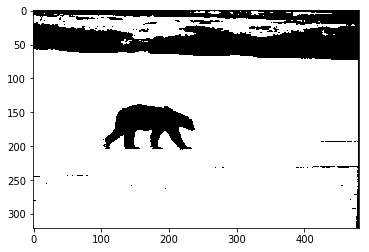

In [4]:
## plot true img
plt.imshow(binary_bsd_dataset[0], cmap = plt.get_cmap('gray'))

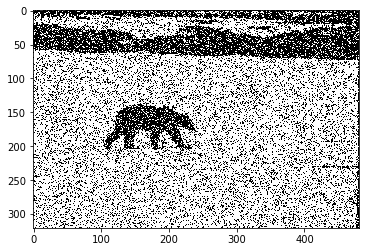

In [5]:
## plot noisy img
plt.imshow(add_noise(binary_bsd_dataset[0], 0.2), cmap = plt.get_cmap('gray'))

In [6]:
f = h5py.File("NDUDE_sup_blind_source_data.hdf5", "w")
f.create_dataset('source_img', data=binary_bsd_dataset)
f.close()


